# 0.0 The Supervised Learning Problem
<sub> StatsLearning Lect1/2b 111213 v2</sub>

A supervised learning problem satisfies the following criteria
* A measure of outcome Y (also known as dependent variable, reponse, target).
* A vector of p predictor measurements X (also called independent variables, regressors, covariates, features)
* In the regression problem, Y is continuious (for ex: Price, blood pressure)
* In the classficiation problem, Y takes finite values in an unordered set (for ex: {Red, Black}, survived/died)
* We have training data (x<sub>1</sub>,y<sub>1</sub>), (x<sub>2</sub>,y<sub>2</sub>)...(x<sub>n</sub>,y<sub>n</sub>)

The objectives of supervised learning: 
* Accurately predict unseen test cases
* Understand which inputs affect the outcome, and how
* Assess the quality of our predictions and infererences

Overall Philosophy:
* Important to understand the idea behind the various techniques
* Simple methods first, to grasp a more sophisticated ones
* Important to assess the performance of a method, to know how well or how badly it is doing

Unsupervised learning is often used as a pre-processor to Supervised Learning

The Netflix Prize:
* 

# 1.0 What is Statistical Learning?
Consider an dependant variable, Y, which represents sales and X, a vector of dependant variables { TV, Radio, Newspaper}. We can represent Y as a function of X i.e., Y -> f (X) + e. 

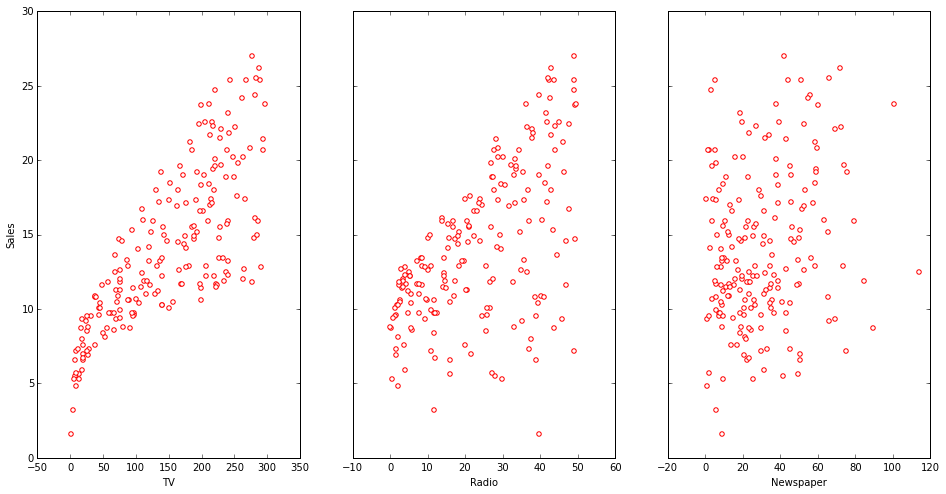

In [33]:
# Required Packages
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data/Advertising.csv", delimiter=",", header=0)
# Check if the data is being read correctly
#print(data.head())

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8), edgecolor='red',c='white', marker='o')
data.plot(kind='scatter',x='Radio', y='Sales', ax=axs[1], edgecolor='red',c='white',marker='o')
data.plot(kind='scatter',x='Newspaper', y='Sales', ax=axs[2], edgecolor='red',c='white',marker='o')


## 1.1 Regression Problems

## 1.1.1 Nearest Neighbour Approach



### What is f(X) good for?
- Prediction of Y for new values of X
- Understand the relevance of each component of X in predicting Y
- Impact of each of the components of X on Y

### Is there an ideal f?
Single valued-x: Ideal $f(x) = E(Y | X = x)$
Vector x: Ideal $f(x1, x2, x3) = E(Y\ |\ X1 = x1, X2 = x2, X3 = x3)$

In other words, it minimizes average prediction error. $E[(Y-f(X))^2 | X = x]$ over all functions f at all points $X=x$ 

$E[(Y-f\hat(X))^2 | X = x]$

Minimizes the above function at all points of X=x

$E[(Y-f\hat(X))^2 | X = x] = [f(x) - f\hat(x)]^2 + Var(\epsilon)$
                       
                     | reducible |+|irreducible|

### How do we estimate f?
- Typically, there are few data points with X = 4 exactly
- So, we cannot compute E(Y | X = x), hence, we relax the definition and estimate f through

$ f\hat(x) = Ave(Y | X \in N(x))$
where N(x) is some neighbourhood of x.

#### Critique:
- Nearest neighbour averaging can be pretty good for small number of variables and largish *N*
- Examples of such methods include (kernel, spline smoothing)
- Nearest neighbour methods can be lousy when *p* is large because of *Curse of dimentionality*

#### Curse of Dimensionality
As dimentions increases, the neighbourhood size increases exponentially (as a factor of size of individual neighbourhood)

## 1.1.2 Structural Models or Parametric Models

### Example Linear model

$f\hat(x) = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2...+\hat\beta_p x_p + \epsilon$

- The linear model is represented in *p + 1* parameters
- We estimate parameters by fitting the model to training data
- Although, it is almost never correct, a linear model is often a good and interpretable approximation to the unknown true function f(x)

[ 5.89555596  0.17285547]


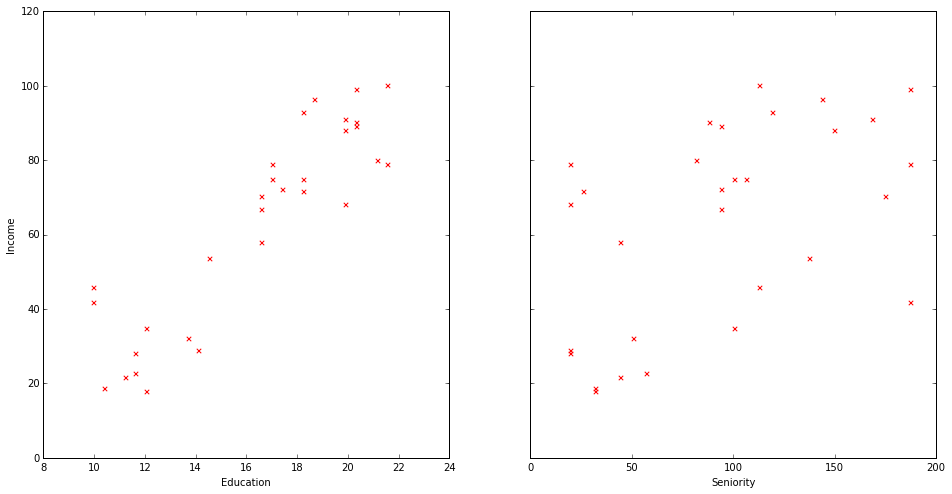

In [2]:
# Required Packages
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data/income2.csv", delimiter=",", header=0)
# Check if the data is being read correctly
# print(data.head())

x = data[['Education','Seniority']]
y = data['Income']

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='Education', y='Income', ax=axs[0], figsize=(16, 8), c='red', marker='x')
data.plot(kind='scatter',x='Seniority', y='Income', ax=axs[1], c='red',marker='x')


reg = LinearRegression()
result = reg.fit(x, y) 
print(result.coef_)



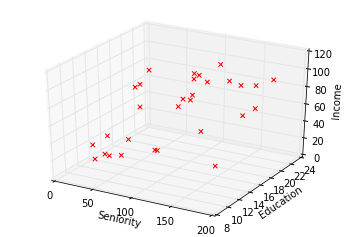

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Seniority'],data['Education'], data['Income'],  c='red', marker='x', alpha=1)
ax.set_zlabel('Income')
ax.set_ylabel('Education')
ax.set_xlabel('Seniority')




#### Trade-offs
- Prediction accuracy vs. interpretability
    - Linear models are easy to interpret and thin-plate splines are not
- Good-fit vs. over-fit or under-fit
    - How do we know when fit is right?
- Parsimony vs. black box
    - Often prefer the simpler model involving fewer variables over black-box models predictor involving all of them

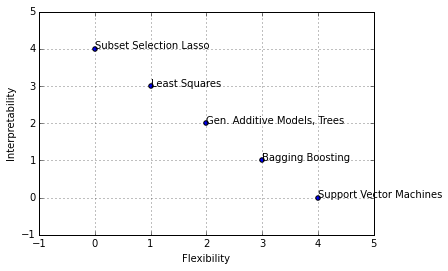

In [5]:
%matplotlib inline


y=[4, 3, 2,1,0]
z=[0, 1, 2, 3, 4]
n=['Subset Selection Lasso','Least Squares','Gen. Additive Models, Trees','Bagging Boosting','Support Vector Machines']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

plt.grid()
plt.ylabel('Interpretability')
plt.xlabel('Flexibility')

### Assessing Model Accuracy
Suppose a model f-hat is fit to some training data $Tr = ( Xi, Yi )^N$. 
* To assess the performance, we could compute the average square prediction error over Tr. 
  - $MSE_{Tr}  = Ave_{i \in Tr} [y_i - \hat f(x_i)]^2$
* To avoid detect over-fitting in our training data, the mean square error must also be calculated with a *fresh* data set.
  - $MSE_{fresh}  = Ave_{i \in fresh} [y_i - \hat f(x_i)]^2$

## Bias Variance Trade-off
Consider the purpose of building unbiased models i.e., model is trained with multiple training datasets. The purpose must be to reduce the 

$E(y_0 - \hat f(x_0))^2 = Var(\hat f (x_0)) + [Bias(\hat f (x_0))]^2 + Var(\epsilon)$

The expectation averages over the variability of $y_0$ as well as the variability in $Tr$. Note that $Bias(\hat f(x_0)) = E[\hat f(x_0)] - f(x_0)$. 

Typically as the $flexbility$ of $\hat f$ increases, its variance increases, and its bias decreases. So choosing the flexbility based on average test error amounts to a **bias-variance trade-off**.


## 1.2 Classification Problems
[Video Reference Link](https://www.youtube.com/watch?v=vVj2itVNku4&list=PLxXnVFYbQ9rmWU6Hv5fNgP4dcSUMJnD2a&index=4)
* Response variable $Y$ is qualitative for ex: $\{spam, ham\}, \{red, blue, green\}, \{0,1,2...9\}$
* Objective: build a classfier $C(X)$ that assigns the given labels to the records based on a vector of input variables $X_i = (X_1^i, X_2^i, X_3^i,...,X_p^i)$

Is there an idear classifier $C(X)$?

How does the classifier work?
* Consider $K classes = (1,2,3,...K)$
* let $p_k(x) = Pr(Y = k|X=x), k \in \{1,2,...,K.\}$
* Then the $Bayes$ $Optimal$ classifier is $C(x) = j$ if $p_j(x) = max\{ p_1(x), p_1(x),...,p_K(x)\}$, where $1 \leq j \leq K$


Nearest neighbour method can be used to estimate the proportion of each of the classes. This can used in single and multiple dimensions of the $X$ vector. As with the regression problem, with additional dimension the error increases. 

Assessing error in classification methods.

$Err_{Te} = Ave_{i\in Te}I[y_i \ne \hat C(x_i)]$

* The $Bayes$ $Classifier$ has the smallest error in the population
* Logistic Regresstion, Generalised Additive Models, Support vector machines are all examples of structured models for $C(x)$


# Chapter 3

### Simple Linear Regression and Confidence intervals
* Linear regression is a simple approach to supervised learning. It assumes the dependence of $Y$ on $X_1, X_2,...,X_p$ is linear. 
* True regression models are never linear!
* Although overly simplistic, linear regression is extremely useful both conceptually and practically

Let's review the advertising data



                                                      Advertising Data


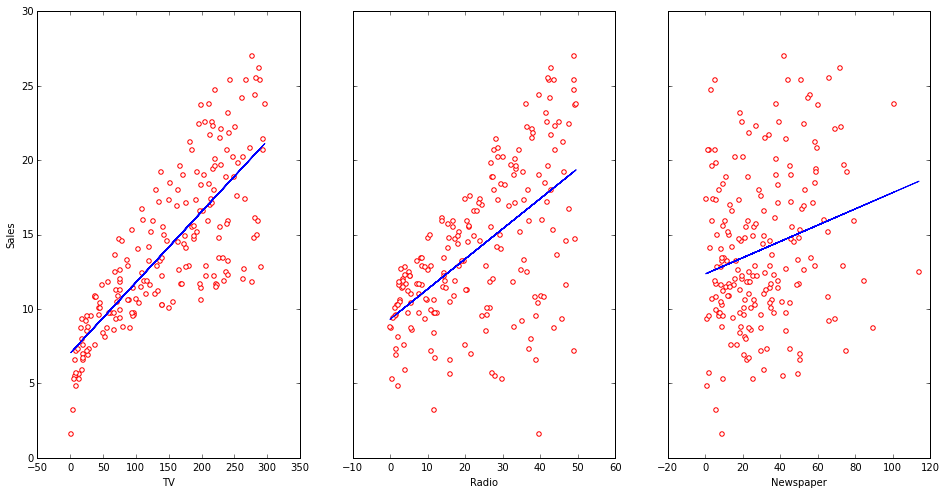

In [47]:
# Required Packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data/Advertising.csv", delimiter=",", header=0)
# Check if the data is being read correctly
# print(data.head())

# Visualize the relationship between the features and the response using scatterplots

xlab = ['TV','Radio', 'Newspaper']
ylab = 'Sales'

fig, axs = plt.subplots(1, 3, sharey=True)
print('                                                      Advertising Data')
for i in range(0,3):
    x = data[xlab[i]]
    y = data[ylab]
    data.plot(kind='scatter', x=xlab[i], y=ylab, ax=axs[i], figsize=(16, 8), edgecolor='red',c='white', marker='o')
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m*x + b, '-')

    


Slope and intercept are m=0.048 c=7.033

R-Squared is 0.612

Confidence Interval for slope 0.042  0.053
t-stat for slope t-stat = 17.757 pValue = 0.00

Confidence Interval for intercept 6.121  7.944
t-stat for intercept t-stat = 15.438 pValue = 0.000



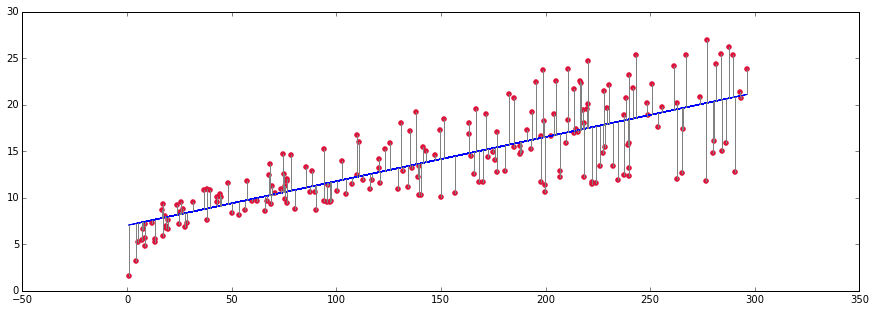

In [139]:
import scipy.stats as stats
from pylab import rcParams

yDat = data['Sales']
xDat = data['TV']

#Set environment variables for a wide graph
rcParams['figure.figsize'] = 15, 5

# Plot a scatter plot
plt.scatter(xDat, yDat, edgecolor='crimson',c='crimson', marker='o')
coeffs = np.polyfit(xDat, yDat, 1)
m,b = coeffs.tolist()

# Polynomial Coefficients
results = {}

# r-squared
p = np.poly1d(coeffs)

#Calculate predicted values of y
yHat = yHat = m*xDat + b

#Calculate average of y
yBar = np.sum(yDat)/len(yDat)

ssreg = np.sum((yHat-yBar)**2)

sstot = np.sum((yDat - yBar)**2)

#Variation explianed 
rss = np.sum((yDat-yHat)**2)
results['determination'] = 1 - rss / sstot

#Calculate Standard Error 
e = yDat - yHat
eVar = np.var(e)
xBar = np.sum(xDat)/len(xDat)

den = np.sum((xDat - xBar)**2)
num = (eVar)
#Standard error of slope
m_SE =  np.sqrt( num / den)

#Standard error of the intercept
b_SE = np.sqrt(num * (1.0/len(yDat) + ((xBar**2) /den) ))

#p-value of the slope
m_pval = stats.t.sf(np.abs(m/m_SE), len(yDat-2))*2

#p-value of the intercept
b_pval = stats.t.sf(np.abs(b/b_SE), len(yDat-2))*2

print 'Slope and intercept are m=%3.3f c=%3.3f\n'%( coeffs.tolist()[0],coeffs.tolist()[1])

print 'R-Squared is %3.3f\n'% results['determination']

print 'Confidence Interval for slope %3.3f  %3.3f'%(m - 2*m_SE, m+2*m_SE)
print 't-stat for slope t-stat = %3.3f pValue = %3.3f\n' % (m / m_SE, m_pval)

print 'Confidence Interval for intercept %3.3f  %3.3f'%( b - 2*b_SE, b+2*b_SE)
print 't-stat for intercept t-stat = %3.3f pValue = %3.3f\n' % (b / b_SE, b_pval)


plt.plot(xDat, m*xDat + b, '-')


#Draw a line from each point to the predicted line
for i in range(0,yDat.size):
    x = xDat[i]
    yHat = m*xDat[i] + b
    plt.plot([xDat[i],xDat[i]],[yDat[i],yHat],color='gray')

    


### Linear Regression for adversiting data
Questions we might ask:
* Is there a relationship between advertising budget and sales?
* How strong is the relationship between advertising budget and sales?
* Which media contribute to sales?
* How accurately can we we predict for future sales?
* Is this relationship linear?
* Is there synergy among the advertising media?


### Important Questions on Regression
1. Is at least one of the predictors $X_1, X_2,...,X_p$ useful in predicting a response?
2. Do all predictors help to explian Y, or is only a subset of predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?'

### Simple linear regression using a single predictor X.
* We assume a model
$Y = \beta_0 + \beta_1X + \epsilon$

    * $\beta_0$ Intercept
    * $\beta_1$ Slope

* Prediction
    * $\hat y = \hat\beta_0 + \hat\beta_1x_1$
    * $\hat y$ is the prediction

#### Estimation of the parameters by least squares
* Residual = $e_i = y_i - \hat y_i$
* Residual Sum of Squares $RSS = e_1^2+e_2^2+...+e_n^2$
    * or $RSS = (y_1 - \hat\beta_0 - \hat\beta_1x_1 )^2 + (y_2 - \hat\beta_0 - \hat\beta_1x_2 )^2 +...+ (y_n - \hat\beta_0 -\hat\beta_1x_n )^2$

$\hat\beta_1 = \frac{\Sigma_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\Sigma_{i=1}^n (x_i - \bar x)^2}$

$\hat\beta_0 = \bar y - \hat \beta_1 \bar x$

$SE(\hat\beta_1) = \frac{\sigma^2}{(x_i - \bar x)^2}$

$95\%\ confidence\ interval\ =\ \hat\beta_1\ \pm\ 2\ *\ SE(\ \hat\beta_1\ ) $


#### Is at least one predictor useful?

$F=\frac{(TSS - RSS)/p}{RSS/(n-p-1)} \sim F_{p,n-p-1}$

Drop in Training Error / No. of parameters
/
Mean Squared Residual / (n - p - 1)


### Multiple Linear Regression


$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon$

$Sales = \beta_0 + \beta_1 TV + \beta_2 Radio + \beta_3 Newspaper + \epsilon$

* The ideal scenario is when the predictors are uncorrelated
    * Each coefficient can be estimated and tested seperately
    * Interpretation related unit change in $x_i$ leads to measurable change in $Y$
* Correlattions amongst predictors cause problems:
    * The variance of all coefficients tends to increase sometimes dramatically
    * Interpretations become hazardous - when $X_j$ changes, everything changes
* Claims of causality must be avoided for observational data

#### The woes of interpreting regression coefficients
"Data Analysis and Regression" Mosteller and Turkey, 1977
* Two examples

"Essentialls, all models are wrong, but some are useful"


"The only way to find out what will happen when a complex system is disturbed is to disturb the system, not merely observe it passively."



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pylab import pcolor, show, colorbar, xticks, yticks


def reg(x, y):
    ones = np.ones(len(y))
    x['Intercept'] = ones
    results = sm.OLS(y, x).fit()
    return results

def correl(x):
    for i in (0,xDat.columns):
        for j in (0,xDat.columns):
            iName = xDat.columns.values.tolist()[i]
            jName = xDat.columns.values.tolist()[j]
            print iName, jName, np.corrcoef(xDat[i],xDat[j])

data = pd.read_csv("data/Advertising.csv", delimiter=",", header=0)
print "                Correlation Matrix"
print data.corr(), "\n\n"

yDat = data['Sales']

xDat = data[['TV', 'Radio','Newspaper']]
#print len(xDat.columns)
print reg(xDat,yDat).summary()

xDat = data[['TV', 'Radio']]
print reg(xDat,yDat).summary()

xDat['TV_Radio'] = xDat['TV'] * xDat['Radio']
print reg(xDat,yDat).summary()




                Correlation Matrix
            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000 


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 21 Dec 2015   Prob (F-statistic):           1.58e-96
Time:                        20:13:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:            

C:\Python27\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 21 Dec 2015   Prob (F-statistic):          6.68e-146
Time:                        20:13:10   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
TV             0.0191      0.002     12.699      0.

### Deciding on important variables

* The most direct approach is called all subsets regression: we compute the least squares fit for all possible subsets and then choose between them based on some criterion that balances training error with model size

* All possible subsets of a set = $2^p$; And when p > 40 there are over a billion models

#### Forward Selection
* Begin with null model - a model that contains an intercept with no predictors
* Fit p simple linear regression and add to the null model the variable that results in the lowest RSS.
* Add to the model the variable that results in the lowest RSS amongst all two-variable models
* Continue until some stopping rule is reached. For instance, we may stop after p-value is above some threshold

#### Backward Selection
* Begin with all the variables in the  model
* Remove the variable with the largest p-value
* The new (p-1) variable model is fit, and the variable with the largest p-value is removed. 
* Continue until some stopping rule is reached. For instance, we may stop after p-value is above some threshold

Akaike Information Criterion (AIC)
Bayesian Information Criterion (BIC)
Cross-Validation (CV)

### Other considerations in the Regression Model

#### Qualitative Predictors
* Some predictors are not quantitative but are qualitative
* These are called categorical variables (or factor variables)
* Ex: Gender, Race, Education level

If a categorical variable has $k$ levels then make $k-1$ dummy variables to represent the levels. For example if there are three races that needs to be coded create (a) AA variable that is 1 $iff$ person is African American (b) CC variable that is 1 $iff$ person is Caucasian. If both AA and CC are 0 then person is Asian.   

Dummy variables 

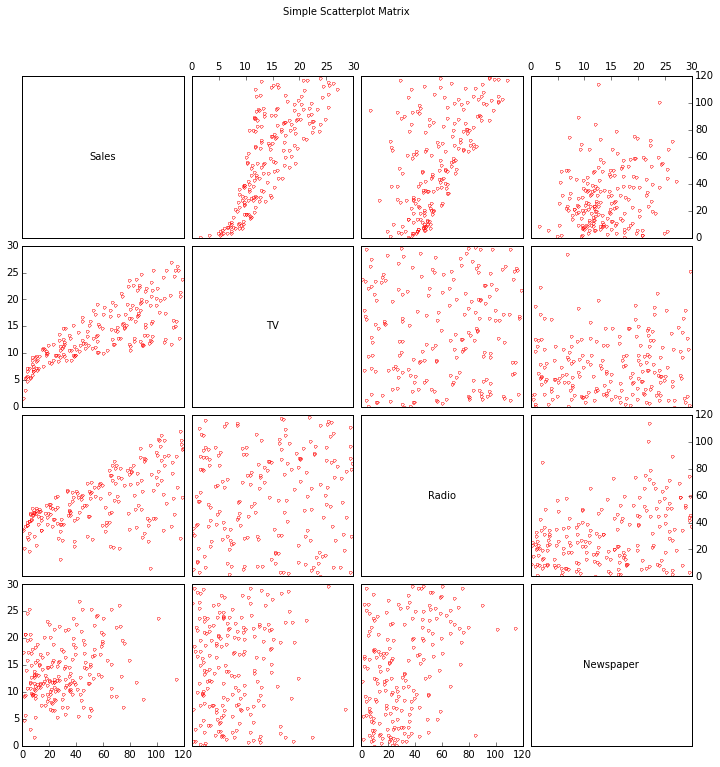

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Mon, 21 Dec 2015   Prob (F-statistic):              0.957
Time:                        20:13:23   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
caucasianFlag   -12.5025     56.681     -0.221

C:\Python27\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def scatterPlotMatrix(data):
    
    fig = scatterplot_matrix(data,data.columns.values,
            linestyle='none', marker='.', color='red', mfc='none')
    
    fig.suptitle('Simple Scatterplot Matrix')
    plt.show()

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numdata, numvars = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')
    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            #print 'plotting x = ', x, 'y = ',y
            #print data[[0]]

            axes[x,y].plot(data[[x]], data[[y]], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
    return fig

def labelMarriage(row):
    if row['Married'] == 'Yes':
        return 1
    else:
        return 0

def labelX(row, colName, trueVal):
    if row[colName] == trueVal:
        return 1
    else:
        return 0
    
data = pd.read_csv("data/Advertising.csv", delimiter=",", header=0)
#print data
data = data [['Sales', 'TV', 'Radio', 'Newspaper']]
scatterPlotMatrix(data)

data = pd.read_csv("data/Credit.csv", delimiter=",", header=0)
data = data[['Income','Limit','Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']]
data = data[[ 'Married', 'Ethnicity', 'Balance']]
data['marriedFlag'] = data.apply (lambda row: labelMarriage (row),axis=1)
data['caucasianFlag'] = data.apply (lambda row: labelX (row,'Ethnicity','Caucasian'),axis=1)
data['afAmFlag'] = data.apply (lambda row: labelX (row,'Ethnicity','African American'),axis=1)
data['asianFlag'] = data.apply (lambda row: labelX (row,'Ethnicity','Asian'),axis=1)
#print data
data = data [['marriedFlag', 'caucasianFlag', 'afAmFlag', 'asianFlag', 'Balance']]
#scatterPlotMatrix(data)
yDat = data ['Balance']
xDat = data [['caucasianFlag', 'asianFlag',]]
print reg(xDat,yDat).summary()
